In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random

In [ ]:
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 
import ipywidgets as widgets
from ipywidgets import Box

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
spotify_top50 = pd.read_csv("spotify_data.csv", encoding = "ISO-8859-1", error_bad_lines=False)
random_playlist = ""

In [ ]:
top50 = spotify_top50.drop(columns = ['ï»¿sel', 'year', 'artist', 'top genre', 'added']).dropna().set_index('title')
top50.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
title,,,,,,,,,,
Made You Look,145.0,53.0,84.0,-4.0,8.0,88.0,134.0,35.0,7.0,87.0
Anti-Hero,97.0,64.0,64.0,-7.0,14.0,53.0,201.0,13.0,5.0,96.0
Calm Down (with Selena Gomez),107.0,81.0,80.0,-5.0,11.0,80.0,239.0,38.0,4.0,92.0
Question...?,109.0,50.0,75.0,-9.0,30.0,11.0,211.0,20.0,17.0,88.0
Hours In Silence,118.0,40.0,50.0,-11.0,27.0,11.0,399.0,23.0,12.0,83.0


In [ ]:
top50.isna().sum()

bpm      0
nrgy     0
dnce     0
dB       0
live     0
val      0
dur      0
acous    0
spch     0
pop      0
dtype: int64

In [ ]:
new_music = pd.read_csv("new_music.csv", encoding = "ISO-8859-1", error_bad_lines=False)
new_music.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,ï»¿sel,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Mama, Dolly, Jesus",Madeline Edwards,NaN,2022.0,2022â11â04,139.0,78.0,59.0,-4.0,11.0,47.0,165.0,30.0,8.0,43.0
1,2,Missing You (with Ashe),Stephen Sanchez,gen z singer-songwriter,2022.0,2022â11â04,115.0,34.0,64.0,-12.0,17.0,33.0,236.0,32.0,6.0,58.0
2,3,Otherside,Ayron Jones,modern hard rock,2022.0,2022â11â04,112.0,71.0,44.0,-6.0,8.0,23.0,227.0,0.0,4.0,42.0
3,4,Jazzercise,Okay Kaya,alternative r&b,2022.0,2022â11â04,98.0,44.0,73.0,-11.0,22.0,68.0,197.0,66.0,4.0,41.0
4,5,Privileged Rappers,Drake,canadian hip hop,2022.0,2022â11â04,144.0,61.0,93.0,-7.0,12.0,62.0,161.0,0.0,20.0,84.0


In [ ]:
new_music = new_music.drop(columns = ['ï»¿sel','added']).dropna()
new_music

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,Missing You (with Ashe),Stephen Sanchez,gen z singer-songwriter,2022.0,115.0,34.0,64.0,-12.0,17.0,33.0,236.0,32.0,6.0,58.0
2,Otherside,Ayron Jones,modern hard rock,2022.0,112.0,71.0,44.0,-6.0,8.0,23.0,227.0,0.0,4.0,42.0
3,Jazzercise,Okay Kaya,alternative r&b,2022.0,98.0,44.0,73.0,-11.0,22.0,68.0,197.0,66.0,4.0,41.0
4,Privileged Rappers,Drake,canadian hip hop,2022.0,144.0,61.0,93.0,-7.0,12.0,62.0,161.0,0.0,20.0,84.0
5,Not There,KUÄKA,electra,2022.0,157.0,37.0,66.0,-12.0,11.0,7.0,202.0,67.0,4.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Kamikaze,Connie Constance,uk contemporary r&b,2022.0,165.0,71.0,46.0,-5.0,26.0,47.0,138.0,0.0,9.0,44.0
93,"They Want It, But No",Tobe Nwigwe,christian hip hop,2022.0,135.0,94.0,62.0,-7.0,11.0,33.0,157.0,1.0,10.0,52.0
94,Pretty Boy,Noel Gallagher's High Flying Birds,britpop,2022.0,157.0,89.0,52.0,-6.0,9.0,71.0,295.0,0.0,3.0,57.0
96,Nightbird,DJ Snake,dance pop,2022.0,126.0,81.0,81.0,-6.0,14.0,65.0,156.0,1.0,5.0,59.0


In [ ]:
test_df = new_music.drop(columns = ['artist','top genre']).dropna()

In [ ]:
test_df = test_df.set_index('title')

In [ ]:
test_df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
title,,,,,,,,,,,
Missing You (with Ashe),2022.0,115.0,34.0,64.0,-12.0,17.0,33.0,236.0,32.0,6.0,58.0
Otherside,2022.0,112.0,71.0,44.0,-6.0,8.0,23.0,227.0,0.0,4.0,42.0
Jazzercise,2022.0,98.0,44.0,73.0,-11.0,22.0,68.0,197.0,66.0,4.0,41.0
Privileged Rappers,2022.0,144.0,61.0,93.0,-7.0,12.0,62.0,161.0,0.0,20.0,84.0
Not There,2022.0,157.0,37.0,66.0,-12.0,11.0,7.0,202.0,67.0,4.0,43.0


In [ ]:
# Load the data
train_df = pd.read_csv('spotify_data.csv')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

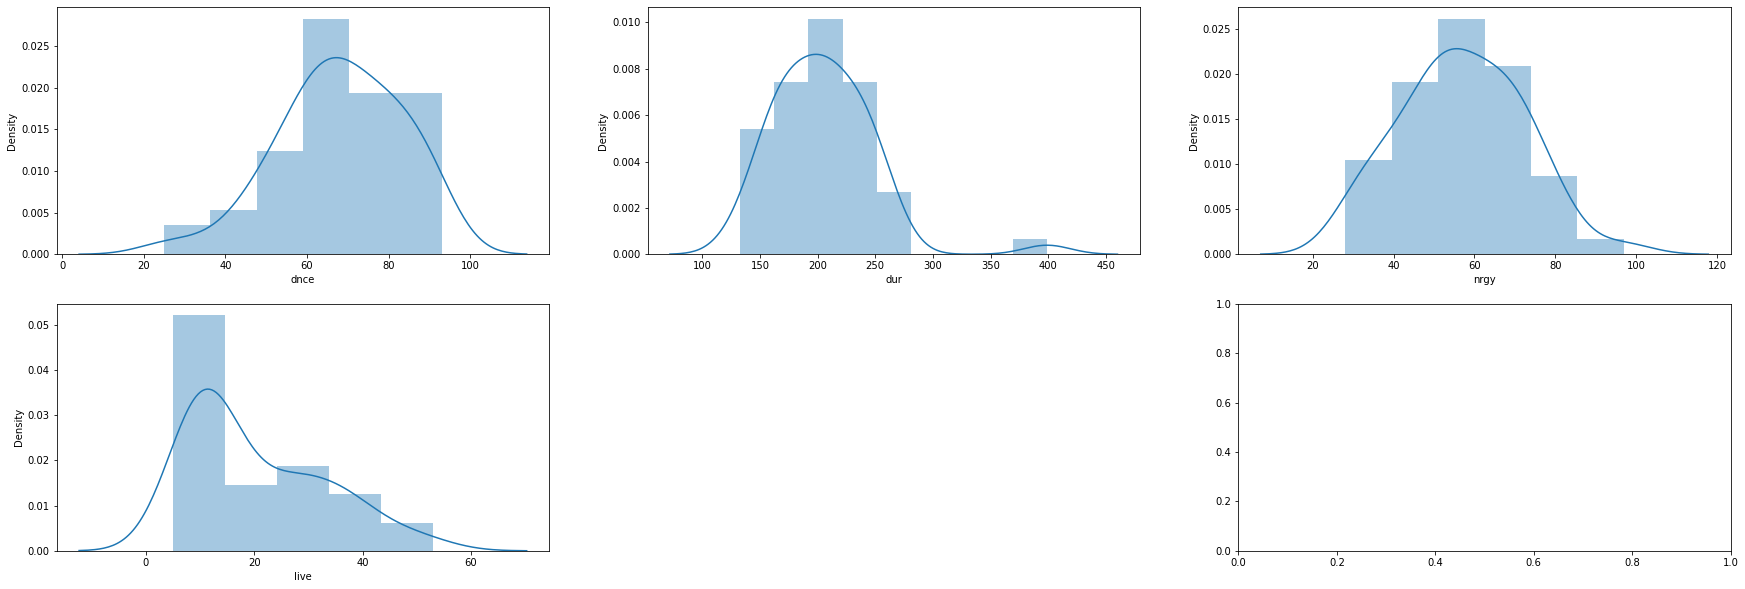

In [ ]:
plt.figure(figsize = (30, 10))
plt.subplot(231)
sns.distplot(train_df['dnce'])
plt.subplot(232)
sns.distplot(train_df['dur'])
plt.subplot(233)
sns.distplot(train_df['nrgy'])
plt.subplot(234)
#sns.distplot(train_df['instrumentalness'])
#plt.subplot(235)
sns.distplot(train_df['live'])
plt.subplot(236)
#sns.distplot(train_df['loudness'])
plt.show()

In [ ]:
train_df = train_df.reset_index()

In [ ]:
train_df.isnull().any().any()

True

In [ ]:
train_df.isnull().any()

sel          False
title         True
artist        True
top genre     True
year          True
added         True
bpm           True
nrgy          True
dnce          True
dB            True
live          True
val           True
dur           True
acous         True
spch          True
pop           True
dtype: bool

In [ ]:
import plotly.express as px

In [ ]:
def func(df):
    if df == 1:
        return 'Yes'
    else:
        return 'No'
dataset['isExplicit'] = dataset['explicit'].apply(func)
px.pie(data_frame = dataset, names = 'isExplicit', hole = 0.2, title = 'Explicit')

NameError: ignored

In [ ]:
fig = px.scatter(top50, x="live", y="dnce", size="pop",color="isE" log_x=True,size_max=30)
fig.show()

In [ ]:
train_df['pop'] = train_df['pop'].fillna(0).astype(int)
train_df['dur'] = train_df['dur'].fillna(0).astype(int)

In [ ]:
test_df['pop'] = test_df['pop'].fillna(0).astype(int)
test_df['dur'] = test_df['dur'].fillna(0).astype(int)

In [ ]:
#def func(df):
    if df > 75:
        return 'Very Popular'
    elif df > 50 and df < 76:
        return 'Popular'
    elif df > 25 and df < 51:
        return 'Average'
    else:
        return 'Not popular'
train_df['pop_p'] = train_df['pop'].apply(func)
px.pie(data_frame = train_df, names = 'pop', hole = 0.2, title = 'Popularity')

In [ ]:
#def func(df):
    if df > 75:
        return 'Very Popular'
    elif df > 50 and df < 76:
        return 'Popular'
    elif df > 25 and df < 51:
        return 'Average'
    else:
        return 'Not popular'
test_df['pop'] = test_df['pop'].apply(func)
px.pie(data_frame = test_df, names = 'pop', hole = 0.2, title = 'Popularity')

IndentationError: ignored

In [ ]:
dff=train_df.head(20)
px.scatter_3d(x=dff.title,y=dff.live,z=dff.dnce,color=dff.pop,labels={'x':'name','y':'type','z':'danceability','color':'popularity'})

ValueError: ignored

In [ ]:
y=pd.DataFrame(train_df['artist'].value_counts().head()).reset_index()
y.columns=['Artist','Songs_Count']
y

,Artist,Songs_Count
0,Drake,10
1,Taylor Swift,10
2,Bad Bunny,4
3,Joji,2
4,Meghan Trainor,1


In [ ]:
X = train_df['dur']
Y = train_df['pop']
C = linear_model.LinearRegression()
X=np.expand_dims(X, axis=1)
Y=np.expand_dims(Y, axis=1)
C.fit(X,Y)
prediction= C.predict(X)

ValueError: ignored

In [ ]:
# linear regression
regressor = LinearRegression()
regressor.fit(X,Y)

ValueError: ignored

In [ ]:
# prediction
y_pred = regressor.predict(X)

### top 50 dur and pop

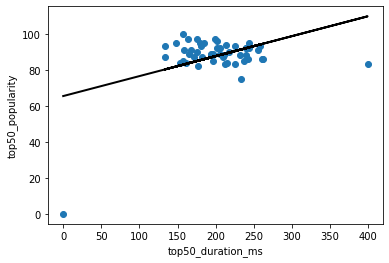

The Line of best fit
Mean Square Error 143.41131236876
MSE: 143.41131236876
MAE: 6.926663467115957
RMSE: 11.975446228377463
r2_score: 0.1884709763878305


In [ ]:
plt.scatter(X,Y)
plt.xlabel('top50_duration_ms',fontsize=10)
plt.ylabel('top50_popularity',fontsize=10)
plt.plot(X,prediction,color='black',linewidth=2)
plt.show()


print("The Line of best fit")
print('Mean Square Error', metrics.mean_squared_error(Y,prediction))
print("MSE:",metrics.mean_squared_error(Y,prediction))
print("MAE:",metrics.mean_absolute_error(Y,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y,prediction)))
print("r2_score:",metrics.r2_score(Y,prediction))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt= DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X,Y)

y_pred_dt= regressor_dt.predict(X_test)

print("Training Score of Decision Tree Regressor is: {}\n".format(regressor_dt.score(X_train, y_train)))
print("R2 Score of Decision Tree Regressor is: {}\n".format(r2_score(y_test, y_pred_dt)))
print("Mean Squared Error of Decision Tree Regressor is: {}\n".format(mean_squared_error(y_test, y_pred_dt)))
print("Mean Absolute Error of Decision Tree Regressor is: {}\n".format(mean_absolute_error(y_test, y_pred_dt)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names



ValueError: ignored

In [ ]:
X = test_df['dur']
Y = test_df['pop']
C = linear_model.LinearRegression()
X=np.expand_dims(X, axis=1)
Y=np.expand_dims(Y, axis=1)
C.fit(X,Y)
prediction= C.predict(X)

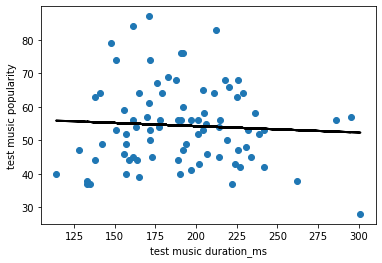

The Line of best fit
Mean Square Error 144.5198596679098
MSE: 144.5198596679098
MAE: 9.580857904125484
RMSE: 12.021641305076017
r2_score: 0.0035497253126371975


In [ ]:
plt.scatter(X,Y)
plt.xlabel('test music duration_ms',fontsize=10)
plt.ylabel('test music popularity',fontsize=10)
plt.plot(X,prediction,color='black',linewidth=2)
plt.show()


print("The Line of best fit")
print('Mean Square Error', metrics.mean_squared_error(Y,prediction))
print("MSE:",metrics.mean_squared_error(Y,prediction))
print("MAE:",metrics.mean_absolute_error(Y,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y,prediction)))
print("r2_score:",metrics.r2_score(Y,prediction))

### top50 and new music train and test

In [ ]:
# Load the data
train = pd.read_csv('spotify_data.csv', encoding = "ISO-8859-1")
test = pd.read_csv('new_music.csv', encoding = "ISO-8859-1")

In [ ]:
X_train = spotify_top50[['bpm',	'nrgy',	'dnce',	'dB',	'live',	'val', 'dur', 'acous', 'spch']].dropna()
y_train = spotify_top50['pop'].dropna()

In [ ]:
X_test = new_music[['bpm',	'nrgy',	'dnce',	'dB',	'live',	'val', 'dur', 'acous', 'spch']].dropna()
y_test = new_music['pop'].dropna()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
lireg=LinearRegression() # initialize the model
lireg.fit(X_train,y_train) # fit he model
y_pred=lireg.predict(X_test)


print("Training Score of Linear Regression is: {}\n".format(lireg.score(X_train, y_train)))
print("R2 Score of Linear Regression is: {}\n".format(r2_score(y_test, y_pred)))
print("Mean Squared Error of Linear Regression is: {}\n".format(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error of Linear Regression is: {}\n".format(mean_absolute_error(y_test, y_pred)))

Training Score of Linear Regression is: 0.4162768106780802

R2 Score of Linear Regression is: -10.15131712843681

Mean Squared Error of Linear Regression is: 1617.3278561438335

Mean Absolute Error of Linear Regression is: 38.12197298319103



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt= DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train,y_train)

y_pred_dt= regressor_dt.predict(X_test)

print("Training Score of Decision Tree Regressor is: {}\n".format(regressor_dt.score(X_train, y_train)))
print("R2 Score of Decision Tree Regressor is: {}\n".format(r2_score(y_test, y_pred_dt)))
print("Mean Squared Error of Decision Tree Regressor is: {}\n".format(mean_squared_error(y_test, y_pred_dt)))
print("Mean Absolute Error of Decision Tree Regressor is: {}\n".format(mean_absolute_error(y_test, y_pred_dt)))

Training Score of Decision Tree Regressor is: 1.0

R2 Score of Decision Tree Regressor is: -9.256623669861401

Mean Squared Error of Decision Tree Regressor is: 1487.566265060241

Mean Absolute Error of Decision Tree Regressor is: 36.53012048192771



In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor(n_estimators=300, random_state=0)
regressor_rf.fit(X_train,y_train)

y_pred_rf=regressor_rf.predict(X_test)

print("Training Score of Random Forest Regression is: {}\n".format(regressor_rf.score(X_train, y_train)))
print("R2 Score of Random Forest Regression is: {}\n".format(r2_score(y_test, y_pred_rf)))
print("Mean Squared Error of Random Forest Regression is: {}\n".format(mean_squared_error(y_test, y_pred_rf)))
print("Mean Absolute Error of Random Forest Regression is: {}\n".format(mean_absolute_error(y_test, y_pred_rf)))

Training Score of Random Forest Regression is: 0.8806391256056043

R2 Score of Random Forest Regression is: -8.937701626525639

Mean Squared Error of Random Forest Regression is: 1441.311504417671

Mean Absolute Error of Random Forest Regression is: 36.14008032128514



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.012048192771084338
For max depth =  2  :  0.024096385542168676
For max depth =  3  :  0.024096385542168676
For max depth =  4  :  0.03614457831325301
For max depth =  5  :  0.03614457831325301
For max depth =  6  :  0.03614457831325301
For max depth =  7  :  0.03614457831325301


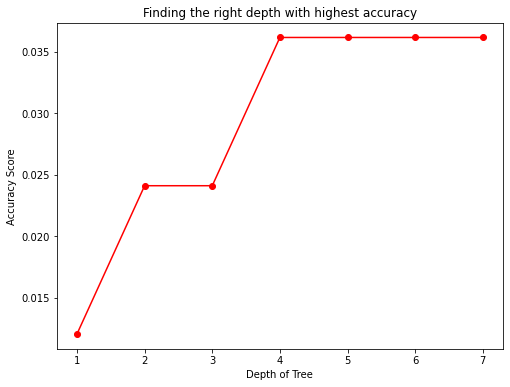

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [ ]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_TEST)
df_TREE = pd.DataFrame()
df_TREE["Top 50"] = train_df["pop"]
df_TREE["New Music"] = test_df["pop"]
df_TREE.head()

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.03614457831325301


In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

In [ ]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

NameError: ignored

### KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#1

In [ ]:
#2

In [ ]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print('With KNN (K=3) train accuracy is: ',knn.score(X_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(X_test,y_test))

With KNN (K=3) train accuracy is:  1.0
With KNN (K=3) test accuracy is:  0.03614457831325301


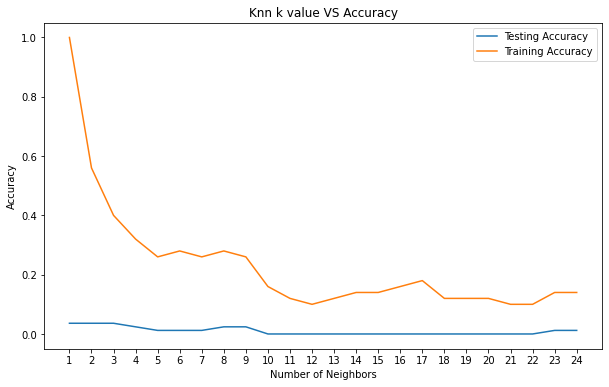

Best accuracy is 0.03614457831325301 with K = 1


In [ ]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:
from sklearn.model_selection import cross_val_score
k = 3
cv_result = cross_val_score(knn,X_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.         0.05882353 0.0625    ]
Cross_val scores average:  0.04044117647058824


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



In [ ]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



### new music lr, lasso, ridge

In [ ]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models,new_music)

,OLS,Lasso,Ridge
0,0.416277,0.399418,0.416275
1,-10.151317,-9.841633,-10.149322


### svm

In [ ]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(X_train,y_train)
print("Train accuracy of svm algo:",svm.score(X_train,y_train))
print("Test accuracy of svm algo:",svm.score(X_test,y_test))

Train accuracy of svm algo: 0.12
Test accuracy of svm algo: 0.0


In [ ]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,X_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

ValueError: ignored

TypeError: ignored

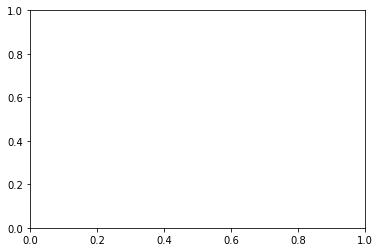

In [ ]:
fig, ax = plt.subplots()
#ax.scatter(y_test, y_pred_lin)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.reshape(-1,1), y_pred_lin.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred_lin).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, y_predicted)))
plt.show()

### lr, random forest visualization

In [ ]:
X= train_df.loc[:,train_df.columns !="popularity"] # all the features accept DV
y = test_df["pop"]

In [ ]:
print(X.shape)
print(y.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(51, 16)
(83,)
X and y rows are mismatched, check dataset again


In [ ]:
X = X.values.reshape((51, 17))
y = y.values.reshape((51, ))

ValueError: ignored

In [ ]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)

ValueError: ignored

In [ ]:
# create a linear regression, random forest & decision tree object
model_regression = linear_model.LinearRegression()
model_random_forest = RandomForestRegressor()
model_decision_tree = DecisionTreeRegressor()

In [ ]:
model_regression.fit(X_train,y_train)
model_random_forest.fit(X_train,y_train)
model_decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# estimate the R² score on training and testing data
# (1) Linear regression
model_regression.score(X_train,y_train)
model_regression.score(X_test,y_test)
# (2) Random Forest
model_random_forest.score(X_train,y_train)
model_random_forest.score(X_test,y_test)
# (3) Decision Tree
model_decision_tree.score(X_train,y_train)
model_decision_tree.score(X_test,y_test)

-9.304472628570055

In [ ]:

test_samples = 10

regression = [] 
random_forest = [] 
decision_tree = []
ground_truth = []
# collecting the models' predictions 
for i in range(test_samples): 
    regression.append(lireg.predict([X_test[i]])) 
    random_forest.append(model_random_forest.predict([X_test[i]]))
    decision_tree.append(model_decision_tree.predict([X_test[i]]))
    ground_truth.append(y_test[i])
# Plotting the models' predictions in comparison to the ground truth
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
plt.legend()
plt.show()

KeyError: ignored

### recommendation system

In [ ]:
def normalize_column(col):
    """
    col - column in the dataframe which needs to be normalized
    """
    max_d = top50[col].max()
    min_d = top50[col].min()
    top50[col] = (top50[col] - min_d)/(max_d - min_d)

In [ ]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = top50.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [ ]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
top50['pred'] = pred
normalize_column('pred')

In [ ]:
class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.title.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.title.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [1,10]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'title']
        return rem_data[columns][:n_top]

In [ ]:
recommender = Song_Recommender(new_music)
recommender.get_recommendations('canon in d', 10)

IndexError: ignored

In [ ]:
recommender.get_recommendations('dynamite', 10)